In [24]:
!pip install pyspark
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark
# Import a Spark function from library
from pyspark.sql.functions import col
spark.stop()

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, TimestampType

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .appName("Crimes_-_2001_to_Present") \
        .config("spark.driver.memory", "6g") \
        .getOrCreate()

In [6]:
# Defining schema
crime_data_schema = StructType([
    StructField("ID", IntegerType(), True),
    StructField("Case Number", StringType(), True),
    StructField("Date", StringType(), True),
    StructField("Block", StringType(), True),
    StructField("IUCR", StringType(), True),
    StructField("Primary Type", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("Location Description", StringType(), True),
    StructField("Arrest", StringType(), True),
    StructField("Domestic", StringType(), True),
    StructField("Beat", StringType(), True),
    StructField("District", StringType(), True),
    StructField("Ward", StringType(), True),
    StructField("Community Area", StringType(), True),
    StructField("FBI Code", StringType(), True),
    StructField("X Coordinate", DoubleType(), True),
    StructField("Y Coordinate", DoubleType(), True),
    StructField("Year", IntegerType(), True),
    StructField("Updated On", TimestampType(), True),
    StructField("Latitude", DoubleType(), True),
    StructField("Longitude", DoubleType(), True),
    StructField("Location", StringType(), True)
])

## Loading the dataset

In [7]:
crime_dataframe = spark.read.format("csv") \
                .option("header", True) \
                .option("inferSchema", False) \
                .schema(crime_data_schema) \
                .load("Crimes_-_2001_to_Present.csv")

In [8]:
crime_dataframe.show()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+------------+-------------+--------------------+
| 5741943|   HN549294|08/25/2007 09:22:...|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422| 

In [9]:
crime_dataframe.count()

6136003

## Cleaning the data

In [10]:
crime_dataframe = crime_dataframe.na.drop(subset=['ID','Case Number'])

In [11]:
crime_dataframe.count()

6136003

In [ ]:
crime_dataframe.select("Date").show()

+--------------------+
|                Date|
+--------------------+
|08/25/2007 09:22:...|
|01/05/2002 09:24:...|
|09/06/2023 05:00:...|
|08/31/2023 12:00:...|
|07/24/2023 09:45:...|
|08/27/2023 07:00:...|
|09/04/2023 09:30:...|
|08/15/2023 02:20:...|
|07/24/2023 04:09:...|
|09/03/2023 10:27:...|
|08/17/2023 07:00:...|
|08/24/2023 02:27:...|
|08/11/2023 11:00:...|
|04/21/2019 12:30:...|
|10/30/2020 04:30:...|
|04/17/2021 03:20:...|
|10/01/2020 12:01:...|
|08/10/2011 12:01:...|
|09/24/2015 12:00:...|
|09/07/2014 12:00:...|
+--------------------+
only showing top 20 rows



In [12]:
from pyspark.sql.functions import to_timestamp
crime_dataframe = crime_dataframe.withColumn("Date", to_timestamp("Date", "MM/dd/yyyy HH:mm:ss a"))

In [13]:
crime_dataframe.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: double (nullable = true)
 |-- Y Coordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: timestamp (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [14]:
crime_dataframe.select("Date").show()

+-------------------+
|               Date|
+-------------------+
|2007-08-25 09:22:18|
|               NULL|
|               NULL|
|2023-08-31 12:00:00|
|               NULL|
|2023-08-27 07:00:00|
|               NULL|
|               NULL|
|               NULL|
|2023-09-03 10:27:00|
|2023-08-17 07:00:00|
|               NULL|
|2023-08-11 11:00:00|
|2019-04-21 12:30:00|
|               NULL|
|               NULL|
|               NULL|
|               NULL|
|               NULL|
|               NULL|
+-------------------+
only showing top 20 rows



## Filter for last ten years

In [15]:
from pyspark.sql.functions import current_date, date_sub, year

current_year = 2023
crime_dataframe = crime_dataframe.filter(year("Date") >= (current_year - 10))

In [16]:
crime_dataframe.count()

376869

## Removing Records

In [17]:
crime_dataframe_filtered = crime_dataframe.filter(~col("Primary Type").isin(
    'NON-CRIMINAL (SUBJECT SPECIFIED)',
    'OTHER OFFENSE',
    'STALKING',
    'NON - CRIMINAL',
    'ARSON'
))

In [18]:
crime_dataframe_filtered.select("Primary Type").show()

+--------------------+
|        Primary Type|
+--------------------+
|  DECEPTIVE PRACTICE|
|               THEFT|
|               THEFT|
|               THEFT|
|OFFENSE INVOLVING...|
|             ROBBERY|
|   WEAPONS VIOLATION|
|         SEX OFFENSE|
|             BATTERY|
|         SEX OFFENSE|
|OFFENSE INVOLVING...|
|OFFENSE INVOLVING...|
|     CRIMINAL DAMAGE|
|               THEFT|
|   CRIMINAL TRESPASS|
|               THEFT|
|   CRIMINAL TRESPASS|
|             BATTERY|
|               THEFT|
|     CRIMINAL DAMAGE|
+--------------------+
only showing top 20 rows



## Merging Columns

In [19]:
from pyspark.sql.functions import when

crime_dataframe_filtered = crime_dataframe_filtered.withColumn("Primary Type",
                  when(col("Primary Type").isin('SEX OFFENSE', 'PROSTITUTION'), 'SEX OFFENSE/PROSTITUTION').otherwise(col("Primary Type")))

In [20]:
crime_dataframe_filtered.show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+------------+-------------+--------------------+
|13210088|   JG423627|2023-08-31 12:00:00|023XX W JACKSON BLVD|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|              STREET| false|   false|1225|     

## Analysis

# Show year-wise trend of the crime for last ten years.

+----+------+
|Year| count|
+----+------+
|2013|115803|
|2014|102114|
|2015| 98053|
|2016| 48053|
|2017|   403|
|2018|   388|
|2019|   321|
|2020|   550|
|2021|   577|
|2022|   611|
|2023|  9996|
+----+------+



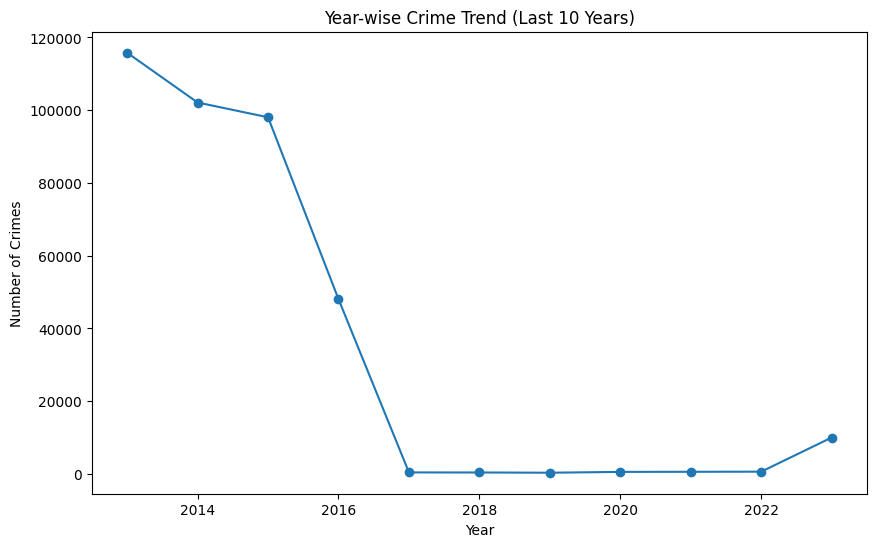

In [21]:
from pyspark.sql.functions import year
import matplotlib.pyplot as plt

crime_data_yearly = crime_dataframe.groupBy(year("Date").alias("Year")).count().orderBy("Year")
crime_data_yearly.show()

year_list = [row.Year for row in crime_data_yearly.collect()]
crime_count = [row["count"] for row in crime_data_yearly.collect()]

plt.figure(figsize=(10, 6))
plt.plot(year_list, crime_count, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Year-wise Crime Trend (Last 10 Years)")
plt.show()

#Find out at which hour of the day crime is highest.

In [22]:
from pyspark.sql.functions import hour

crime_data_hourly = crime_dataframe.groupBy(hour("Date").alias("Hour")).count().orderBy("count", ascending=False)
most_common_hour = crime_data_hourly.first()["Hour"]
print(f"Common hour of crime occurance: {most_common_hour}")

Common hour of crime occurance: 12


#Find top ten crimes and present them as a bar chart.

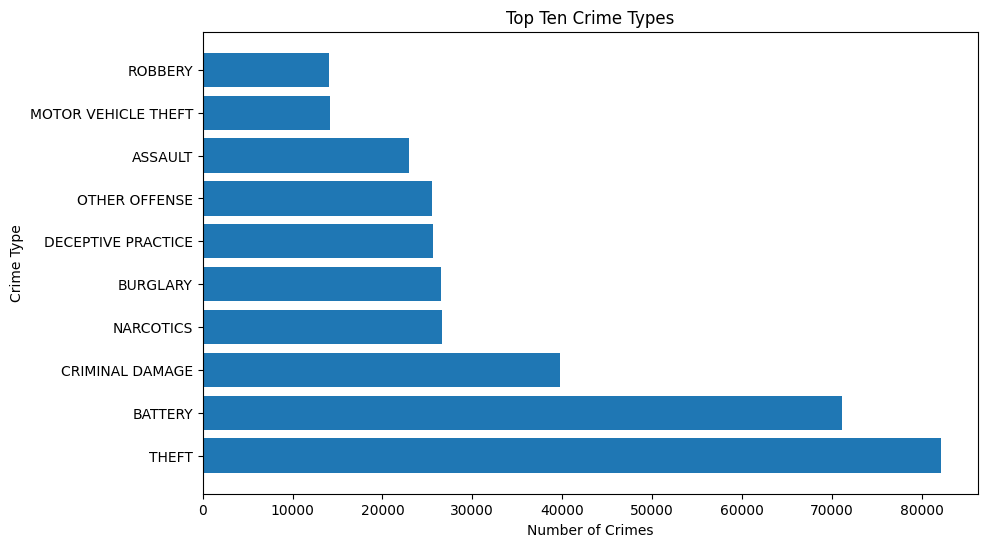

In [23]:
from pyspark.sql.functions import desc

top_crimes = crime_dataframe.groupBy("Primary Type").count().orderBy(desc("count")).limit(10)

crime_types = [row["Primary Type"] for row in top_crimes.collect()]
crime_count = [row["count"] for row in top_crimes.collect()]

plt.figure(figsize=(10, 6))
plt.barh(crime_types, crime_count)
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.title("Top Ten Crime Types")
plt.show()